1. Se lanza una moneda n = 10 veces y se encuentra que r = 7 veces cae cara. Usando el algoritmo de Metrópolis:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from tqdm import tqdm

In [15]:
def Prior(p):
    return np.piecewise(p,[p>=0 and p<=1,p<0 and p>1],[lambda p:1,lambda p:0])

In [16]:
Prior=np.vectorize(Prior)

In [17]:
def Likelihood(p,r,n):
    return  p**r*(1-p)**(n-r)

In [18]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

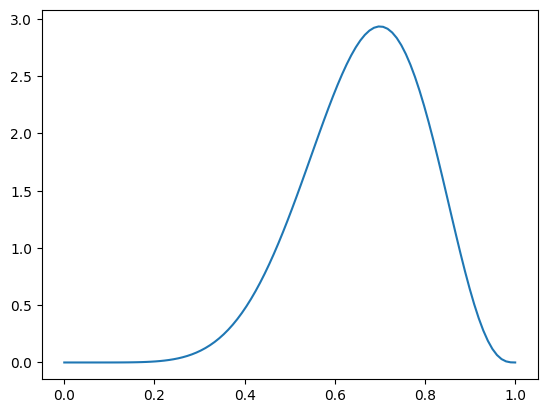

In [19]:
p=np.linspace(0,1,100)
r=7
n =10
Pos=Posterior(p,r,n)


I_=integrate.quad(Posterior,p[0],p[-1],args=(r,n))
Pos=Pos/I_[0]

plt.plot(p,Pos)



In [20]:
def Metropolis(x0, Posterior, NSteps=int(1e5), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,r,n)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]

100%|██████████| 99999/99999 [00:40<00:00, 2457.67it/s]


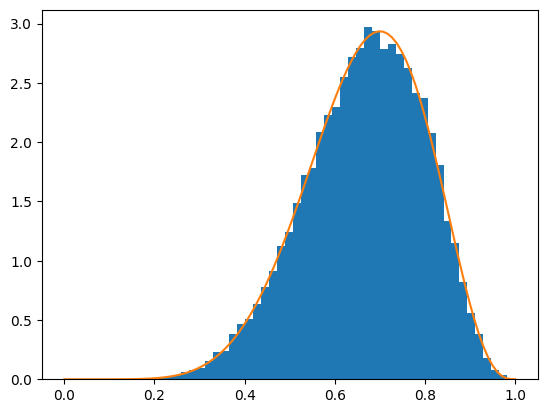

In [21]:
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

plt.hist(MCMC,density=True,bins=50)
plt.plot(p,Pos)

liminf=np.percentile(MCMC,16)
limsup=np.percentile(MCMC,84)
mediana=np.percentile(MCMC,50)
prob=mediana

In [22]:
prob

0.6752121668308436

In [23]:
liminf-mediana,limsup-mediana

(-0.14523556469031296, 0.12589646930041165)

$$
\hat{p}=0.67_{0.14}^{0.12}
$$

In [24]:
r=5
MCMC_even = Metropolis(initparams,Posterior)
Upper_limit_even=np.percentile(MCMC_even,95)

100%|██████████| 99999/99999 [00:41<00:00, 2415.71it/s]


In [25]:
print(prob>Upper_limit_even)

False


No se puede descartar el modelo. Esto debido a que se encuentra con justo el 95 porciento de confianza, por lo que no se puede afirmar que la moneda esta truncada